# 0. Import Dependencies

In [56]:
import csv
import tweepy as tw
import ssl
import pandas as pd
import numpy as np

In [57]:
import plotly.express as px

In [58]:
data = pd.read_csv("/content/tweets.csv")

# 1. Data Analysis

In [59]:
print(data.shape)

(123, 2)


In [60]:
data

,tweet,label
0,RT @millersoto: Volví a ver #ElDebateDefinitiv...,1
1,"RT @honohenriquez: ""Una vez se van las democra...",1
2,"RT @PartidoMIRA: ""Se necesitan más liderazgos ...",1
3,RT @PartidoMIRA: #FedericoEsColombia #FicoEsCa...,1
4,RT @Nevil_22: En #ElDebateDefinitivo sale de n...,0
...,...,...
118,@Margaritarosadf @petrogustavo Vimos un debate...,0
119,"RT @dicalaca18: La actitud de Petro hoy, ademá...",0
120,#VotoPor 🤬🤬🤬🤬🤬🤬OJO 200 AÑOS MAS EN EL LEGADO D...,0
121,"RT @Categrico2: #ElDebateDefinitivo\r\n""El Can...",0


In [61]:
#Classs distribution

d =pd.DataFrame(data["label"].value_counts())
fig = px.pie(d, values ="label", names=["Positive", "Negative"], hole = 0.4, opacity=0.8,
            labels={"label":"Tweets","Tweets":"Number of Samples"})
fig.update_layout(title = dict(text="Pie Chart of Sentiment Feature"))
fig.update_traces(textposition="outside",textinfo="percent+label")
fig.show()

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   123 non-null    object
 1   label   123 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


# 2. Data Preprocessing

In [63]:
!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import re
from cleantext import clean

In [65]:
#Preprocessing functions

def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove tweeted at
    return tweet

def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove hash tags
    return tweet

def remove_av(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

def remove_emoji(tweet):
    """Remove emojis"""
    tweet = clean(tweet, no_emoji=True) 
    return tweet

def remove_punctuation(tweet):
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub("(?<!\n)\n(?!\n)", " ", tweet)
    tweet = re.sub("\n"," ", tweet)
    tweet = tweet.strip(" \n")
    return tweet

def preprocessing(text):
    text = remove_links(text)
    text = remove_users(text)
    text = remove_hashtags(text)
    text = remove_av(text)
    text = remove_emoji(text)
    text = remove_punctuation(text)
    return text

In [66]:
data_prep = data.copy()

In [67]:
data_prep['tweet'] = data_prep['tweet'].apply(preprocessing)

In [68]:
data_prep.head(15)

,tweet,label
0,volvi a ver a fico aunque siento que desaprov...,1
1,una vez se van las democracias no retornan mir...,1
2,se necesitan mas liderazgos femeninos para el ...,1
3,acter me gusta dialogar con respeto y aqui hay...,1
4,en sale de nuevo fico gutierrez con el cuento ...,0
5,que desespero oir a fico es desastroso que niv...,0
6,federico gutierrez si hubo fraude fue a favor ...,0
7,propone para la salud basarse en promocion y p...,1
8,le asegura a los 18 millones de colombianos qu...,1
9,a proposito los invito a leer este hilo donde...,0


In [69]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   123 non-null    object
 1   label   123 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [70]:
data_prep['tweet'].replace('', np.nan, inplace=True)

In [71]:
data_prep.head(15)

,tweet,label
0,volvi a ver a fico aunque siento que desaprov...,1
1,una vez se van las democracias no retornan mir...,1
2,se necesitan mas liderazgos femeninos para el ...,1
3,acter me gusta dialogar con respeto y aqui hay...,1
4,en sale de nuevo fico gutierrez con el cuento ...,0
5,que desespero oir a fico es desastroso que niv...,0
6,federico gutierrez si hubo fraude fue a favor ...,0
7,propone para la salud basarse en promocion y p...,1
8,le asegura a los 18 millones de colombianos qu...,1
9,a proposito los invito a leer este hilo donde...,0


In [72]:
data_prep = data_prep.dropna()
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 122
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   117 non-null    object
 1   label   117 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ KB


## 2.1 Train and validation samples

In [474]:
X = data_prep['tweet']
y = data_prep['label']

# print(X.shape, y.shape)

In [475]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state=64)
# print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

# 3. Modeling

## 3.1 Bidirectional LSTM

In [476]:
from tensorflow.keras.layers import TextVectorization
MAX_FEATURES = 200000 # number of words in the vocab
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')
vectorizer.adapt(X_train.values)
X_train_vectorized_text = vectorizer(X_train.values)
X_valid_vectorized_text = vectorizer(X_valid.values)

print(X_train_vectorized_text.shape, X_valid_vectorized_text.shape, y_train.shape, y_valid.shape)

(81, 1800) (36, 1800) (81,) (36,)


In [477]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout

from tensorflow.keras.utils import plot_model

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [478]:
#Metrics

from keras import backend as K
import tensorflow as tf

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [479]:
BiLSTM_model = Sequential()
# Create the embedding layer 
BiLSTM_model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
BiLSTM_model.add(Bidirectional(LSTM(32, activation='tanh')))
BiLSTM_model.add(Dropout(0.3))
# Feature extractor Fully connected layers
BiLSTM_model.add(Dense(32, activation='relu'))
BiLSTM_model.add(Dropout(0.3))
# Final layer 
BiLSTM_model.add(Dense(1, activation='softmax'))
BiLSTM_model.compile(loss='binary_crossentropy', 
                     optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08, clipnorm=1.0), 
                     metrics=['binary_accuracy', recall_m, precision_m, f1_m])

BiLSTM_history = BiLSTM_model.fit(X_train_vectorized_text,
                    y_train,
                    validation_data=(X_valid_vectorized_text, y_valid),
                    epochs=100,
                    callbacks=[early_stopping],
                    )

Epoch 1/100
3/3 [==============================] - 5s 646ms/step - loss: 0.6943 - binary_accuracy: 0.6049 - recall_m: 1.0000 - precision_m: 0.6115 - f1_m: 0.7583 - val_loss: 0.6936 - val_binary_accuracy: 0.6944 - val_recall_m: 1.0000 - val_precision_m: 0.7188 - val_f1_m: 0.8360
Epoch 2/100
3/3 [==============================] - 0s 146ms/step - loss: 0.6940 - binary_accuracy: 0.6049 - recall_m: 1.0000 - precision_m: 0.6207 - f1_m: 0.7642 - val_loss: 0.6933 - val_binary_accuracy: 0.6944 - val_recall_m: 1.0000 - val_precision_m: 0.7188 - val_f1_m: 0.8360
Epoch 3/100
3/3 [==============================] - 0s 145ms/step - loss: 0.6936 - binary_accuracy: 0.6049 - recall_m: 1.0000 - precision_m: 0.6207 - f1_m: 0.7622 - val_loss: 0.6929 - val_binary_accuracy: 0.6944 - val_recall_m: 1.0000 - val_precision_m: 0.7188 - val_f1_m: 0.8360
Epoch 4/100
3/3 [==============================] - 0s 148ms/step - loss: 0.6934 - binary_accuracy: 0.6049 - recall_m: 1.0000 - precision_m: 0.6023 - f1_m: 0.7511 -

## 3.2 BERT model for sequence classification

In [79]:
!pip install -q transformers

In [80]:
import tensorflow as tf

### 3.2.2 BERT model initialization (Sequence Classification)

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

tokenizer = BertTokenizer.from_pretrained("sagorsarker/codeswitch-spaeng-sentiment-analysis-lince")
model = TFBertForSequenceClassification.from_pretrained("sagorsarker/codeswitch-spaeng-sentiment-analysis-lince", from_pt=True)

### 3.2.1 Make datasets with encoding information (Dataset objects)

In [83]:
df_train = pd.DataFrame({'DATA_COLUMN': X_train, 'LABEL_COLUMN': y_train})
df_valid = pd.DataFrame({'DATA_COLUMN': X_valid, 'LABEL_COLUMN': y_valid})

In [199]:
df_train.loc[df_train["LABEL_COLUMN"] == 1, "LABEL_COLUMN"] = 2
df_valid.loc[df_valid["LABEL_COLUMN"] == 1, "LABEL_COLUMN"] = 2

In [84]:
def convert_data_to_examples(train, valid, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = valid.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'DATA_COLUMN', 
                                                                           'LABEL_COLUMN')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for example in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            example.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=example.label
            )
        )

    def gen():
        for feature in features:
            yield (
                {
                    "input_ids": feature.input_ids,
                    "attention_mask": feature.attention_mask,
                    "token_type_ids": feature.token_type_ids,
                },
                feature.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL_COLUMN'

In [85]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(df_train, df_valid, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2291: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [86]:
train_InputExamples[0]

InputExample(guid=None, text_a='volvi a ver  a fico aunque siento que desaprovecho papayazos lo vi bien sin odio y con tranquilidad', text_b=None, label=1)

In [319]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

### 3.3.3 Metrics

In [187]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 3.3.4 +Hyperparameters and Training

In [384]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy',f1_m,precision_m, recall_m])
              # metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

history = model.fit(train_data, epochs=100, validation_data=validation_data, callbacks=[early_stopping])

Epoch 1/100
6/6 [==============================] - 31s 2s/step - loss: 0.6832 - sparse_categorical_accuracy: 0.6724 - f1_m: 0.6291 - precision_m: 0.6586 - recall_m: 0.6150 - val_loss: 0.6844 - val_sparse_categorical_accuracy: 0.7000 - val_f1_m: 0.5333 - val_precision_m: 0.8000 - val_recall_m: 0.4000
Epoch 2/100
6/6 [==============================] - 5s 757ms/step - loss: 0.4575 - sparse_categorical_accuracy: 0.8161 - f1_m: 0.5771 - precision_m: 0.6822 - recall_m: 0.5036 - val_loss: 0.7212 - val_sparse_categorical_accuracy: 0.6333 - val_f1_m: 0.4848 - val_precision_m: 0.6154 - val_recall_m: 0.4000
Epoch 3/100
6/6 [==============================] - 5s 763ms/step - loss: 0.3261 - sparse_categorical_accuracy: 0.8736 - f1_m: 0.6888 - precision_m: 0.6574 - recall_m: 0.7462 - val_loss: 0.7449 - val_sparse_categorical_accuracy: 0.6000 - val_f1_m: 0.7317 - val_precision_m: 0.7143 - val_recall_m: 0.7500
Epoch 4/100
6/6 [==============================] - 5s 766ms/step - loss: 0.1848 - sparse_cate

# 4. Evaluation

## 4.1 Evaluate Bidirectional LSTM Model

### 4.1.1 Sparse Binnary Accuracy




Best Validation Loss: 0.6115
Best Validation Accuracy: 0.6944


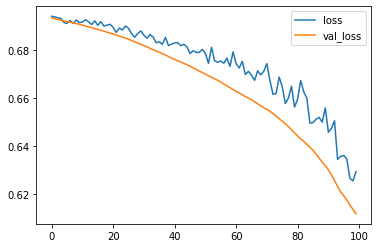

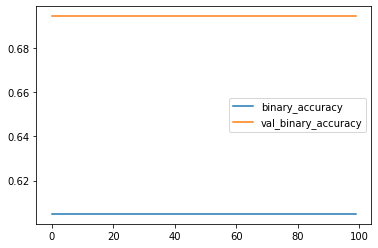

In [480]:
#@title
from matplotlib import pyplot as plt

BiLSTM_history_df = pd.DataFrame(BiLSTM_history.history)
BiLSTM_history_df.loc[:, ['loss', 'val_loss']].plot()
BiLSTM_history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(BiLSTM_history_df['val_loss'].min(), 
              BiLSTM_history_df['val_binary_accuracy'].max()))

### 4.1.2 Precision

Best Validation Precision: 0.7188


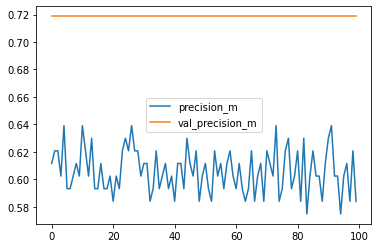

In [481]:
#@title
BiLSTM_history_df = pd.DataFrame(BiLSTM_history.history)
BiLSTM_history_df.loc[:, ['precision_m', 'val_precision_m']].plot()

print(("Best Validation Precision: {:0.4f}")\
      .format(BiLSTM_history_df['val_precision_m'].max()))

### 4.1.3 Recall

Best Validation Recall: 1.0000


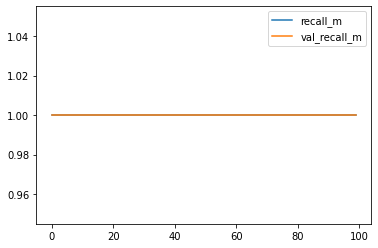

In [482]:
#@title
BiLSTM_history_df = pd.DataFrame(BiLSTM_history.history)
BiLSTM_history_df.loc[:, ['recall_m', 'val_recall_m']].plot()

print(("Best Validation Recall: {:0.4f}")\
      .format(BiLSTM_history_df['val_recall_m'].max()))

### 4.1.4 F1 Score

Best Validation F1 Score: 0.8360


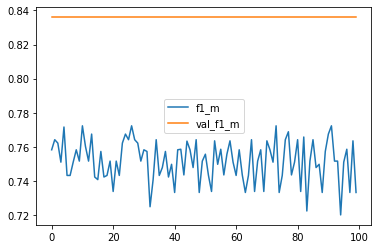

In [483]:
#@title
BiLSTM_history_df = pd.DataFrame(BiLSTM_history.history)
BiLSTM_history_df.loc[:, ['f1_m', 'val_f1_m']].plot()

print(("Best Validation F1 Score: {:0.4f}")\
      .format(BiLSTM_history_df['val_f1_m'].max()))

## 4.2 BERT Model

### 4.2.1 Sparse Categorical Accuracy


Best Validation Loss: 0.6844
Best Validation Accuracy: 0.7000


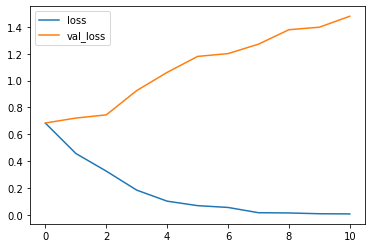

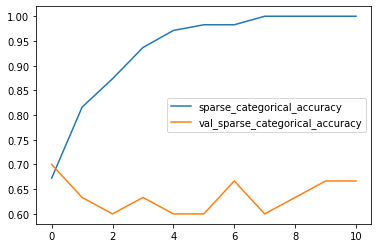

In [484]:
#@title
from matplotlib import pyplot as plt

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_sparse_categorical_accuracy'].max()))

### 4.2.1 Precision

Best Validation Precision: 0.8000


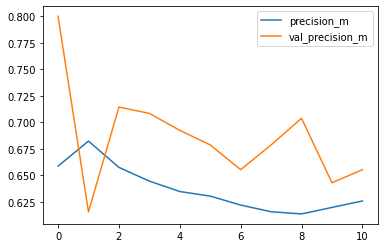

In [485]:
#@title
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['precision_m', 'val_precision_m']].plot()

print(("Best Validation Precision: {:0.4f}")\
      .format(history_df['val_precision_m'].max()))

### 4.2.3 Recall

Best Validation Recall: 0.9500


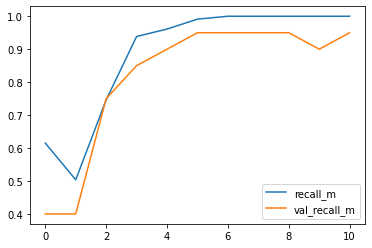

In [486]:
#@title
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['recall_m', 'val_recall_m']].plot()

print(("Best Validation Recall: {:0.4f}")\
      .format(history_df['val_recall_m'].max()))

### 4.2.4 F1 Score

Best Validation F1 Score: 0.8085


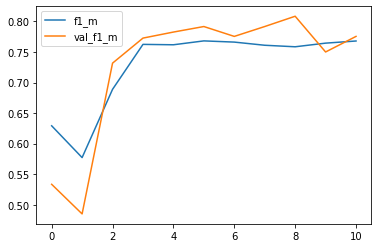

In [487]:
#@title
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['f1_m', 'val_f1_m']].plot()

print(("Best Validation F1 Score: {:0.4f}")\
      .format(history_df['val_f1_m'].max()))

## 4.3 Evaluate BEST MODEL (BERT)

In [488]:
from transformers import pipeline

raw_inputs = [
    "Sujeto estas lleno de odio",
    "Sujeto es el cambio verdadero",
    "Sujeto se va a robar el dinero del pais",
    "Sujeto nos va a solucionar nuestros problemas",
    "Sujeto es un corrupto y nos va a hundir",
    "Sujeto es bueno administrando y traerá bien en su gobierno"
]

inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="tf")
print(inputs)

{'input_ids': <tf.Tensor: shape=(6, 19), dtype=int32, numpy=
array([[   101,  12271,  80030,  17958,  27651,  10343,  10104,  10311,
         10638,    102,      0,      0,      0,      0,      0,      0,
             0,      0,      0],
       [   101,  12271,  80030,  10196,  10125,  19272,  86163,    102,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0],
       [   101,  12271,  80030,  10126,  10321,    169,  96684,  10129,
         10125,  46975,  10127,  48094,    102,      0,      0,      0,
             0,      0,      0],
       [   101,  12271,  80030,  11573,  10321,    169,  15566,  43805,
         76345, 107447,  20088,    102,      0,      0,      0,      0,
             0,      0,      0],
       [   101,  12271,  80030,  10196,  10119,  29162,  46791,  10133,
           193,  11573,  10321,    169,  12041,  11957,    102,      0,
             0,      0,      0],
       [   101,  12271,  80030,  10196,  49341,  10133

In [489]:
outputs = model(inputs)
print(outputs.logits.shape)

(6, 2)


In [490]:
outputs

TFSequenceClassifierOutput([('logits',
                             <tf.Tensor: shape=(6, 2), dtype=float32, numpy=
                             array([[ 0.5782284 , -0.33950526],
                                    [-1.040824  ,  0.74378407],
                                    [ 0.74161243, -0.38850343],
                                    [-1.0349548 ,  0.8486584 ],
                                    [ 0.32325792, -0.07887127],
                                    [-1.4961609 ,  1.3018086 ]], dtype=float32)>)])

In [491]:
predictions = tf.math.softmax(outputs.logits, axis=-1)
print(predictions)

tf.Tensor(
[[0.7145801  0.2854199 ]
 [0.14373505 0.8562649 ]
 [0.75586027 0.24413972]
 [0.13197441 0.8680256 ]
 [0.5991991  0.40080088]
 [0.057434   0.942566  ]], shape=(6, 2), dtype=float32)


In [492]:
model.config.id2label

{0: 'LABEL_0', 1: 'LABEL_1'}

In [493]:
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
classifier(raw_inputs)

[{'label': 'LABEL_0', 'score': 0.7145801782608032},
 {'label': 'LABEL_1', 'score': 0.8562650084495544},
 {'label': 'LABEL_0', 'score': 0.7558603286743164},
 {'label': 'LABEL_1', 'score': 0.8680256009101868},
 {'label': 'LABEL_0', 'score': 0.5991987586021423},
 {'label': 'LABEL_1', 'score': 0.9425659775733948}]